In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
def read_token_csv(csv_path):
    df = pd.read_csv(csv_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    return df

df = read_token_csv('Google Trends Data Challenge Datasets/prices/BTC-USD.csv')

In [4]:
def plot_token_graph(df):
    plt.figure(figsize=(12, 6))
    plt.plot(df['Close'], label='Token Price', color='blue', linewidth=0.5)

    #plt.title('Token Price')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.grid(True, linewidth = 0.2)
    #plt.legend()
    plt.show()

In [5]:
def read_trend_csv(csv_path):
    df = pd.read_csv(csv_path, skiprows=1)
    df['Week'] = pd.to_datetime(df['Week'])
    df.set_index('Week', inplace=True)
    df_monthly = df.resample('M').sum()

    df_monthly = df_monthly.iloc[:-1]

    return df_monthly

#df_monthly = read_trend_csv('Google Trends Data Challenge Datasets/trends/ethereum.csv')

In [6]:
def plot_trend_graph(df_monthly):
    key = df_monthly.columns[0]
    plt.figure(figsize=(12, 6))
    plt.plot(df_monthly[key], label=f'{key}', color='orange', marker='o')

    #plt.title(f'Monthly Google Trends for {key}')
    plt.xlabel('Month')
    plt.ylabel('Search Interest')
    plt.grid(True, linewidth = 0.2)
    #plt.legend()
    plt.tight_layout()
    plt.show()

In [7]:
def print_start_date(df, token_name):
    start_date = df.index.min()
    print(f"{token_name} -> Start Date: {start_date.strftime('%Y-%m')}")

In [8]:
def print_all_start_dates(folder_path):
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            token_name = file_name.replace('.csv', '')
            file_path = os.path.join(folder_path, file_name)
            
            # Read and print the starting date for the token data
            df = read_token_csv(file_path)
            print_start_date(df, token_name)

#print_all_start_dates('Google Trends Data Challenge Datasets/prices')

# Token analysis

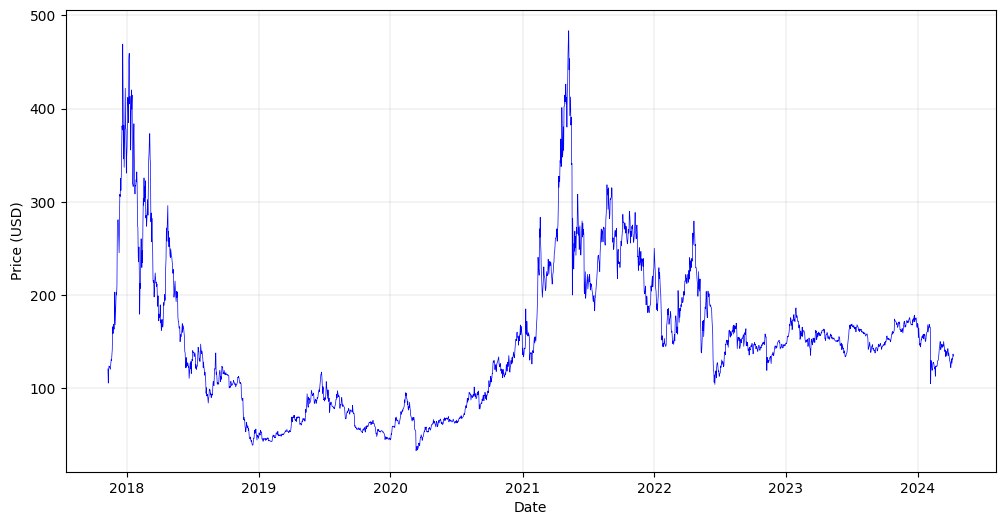

In [9]:
df = read_token_csv('Google Trends Data Challenge Datasets/prices/XMR-USD.csv')
plot_token_graph(df)

# Trend analysis

/var/folders/pp/bdyt1jrd5w5d3twfkg227dtc0000gn/T/ipykernel_12054/2809849707.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').sum()


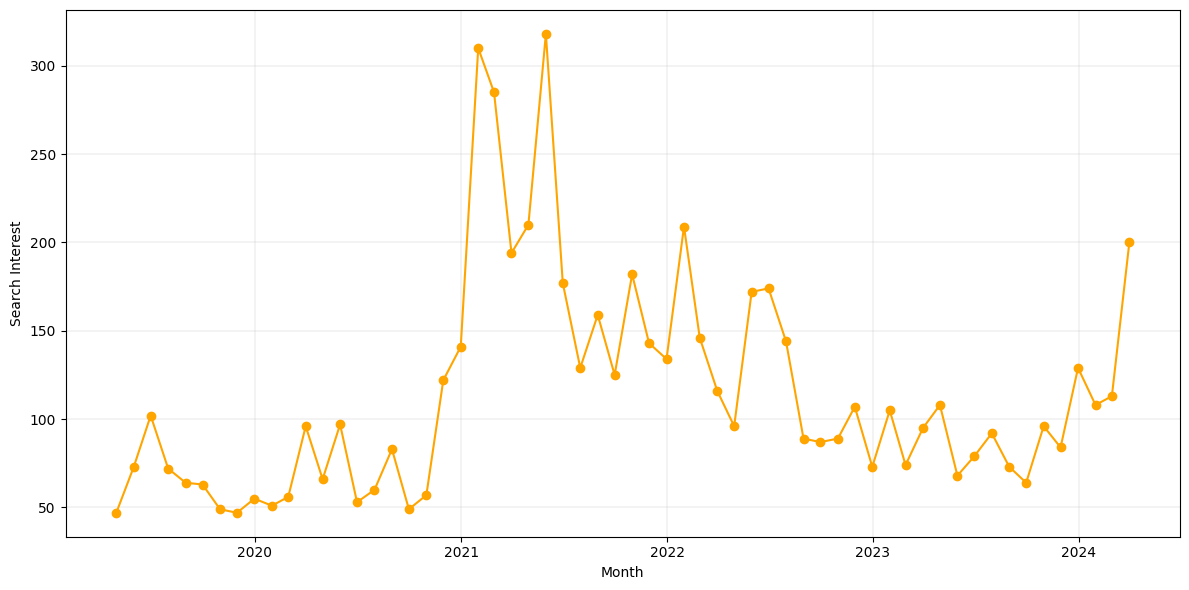

In [11]:
df_monthly = read_trend_csv('Google Trends Data Challenge Datasets/trends/bitcoin.csv')
plot_trend_graph(df_monthly)

# All tokens plot

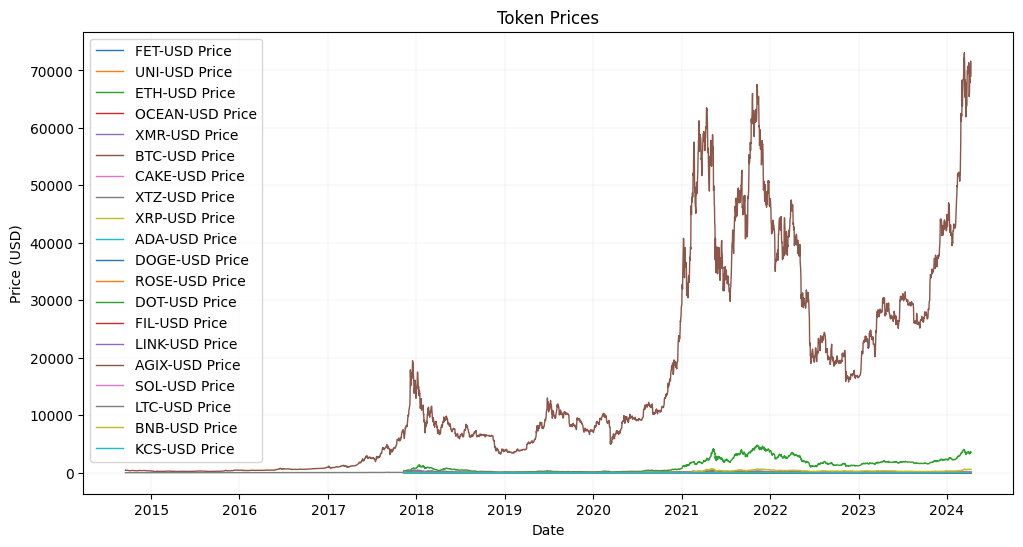

In [76]:
def plot_all_tokens(folder_path):
    tokens = {}
    plt.figure(figsize=(12, 6))
    
    # Loop
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            token_name = file_name.replace('.csv', '')
            file_path = os.path.join(folder_path, file_name)
            
            df = read_token_csv(file_path)
            tokens[token_name] = df
            
            plt.plot(df['Close'], label=f'{token_name} Price', linewidth=1)

    plt.title('Token Prices')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.grid(True, linewidth = 0.1)
    plt.legend()
    plt.show()

folder_path = 'Google Trends Data Challenge Datasets/prices'
plot_all_tokens(folder_path)

# GEO

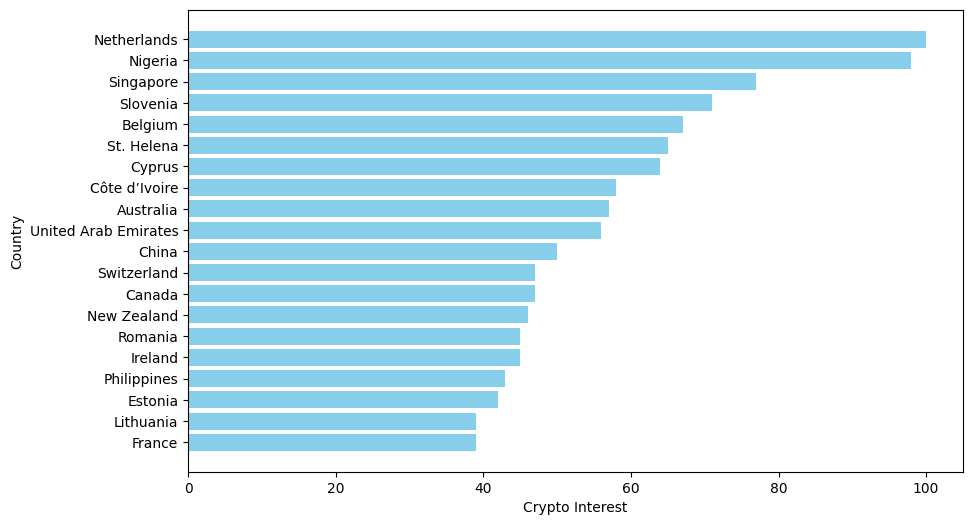

In [130]:
df = pd.read_csv('Google Trends Data Challenge Datasets/additional_datasets/geo_crypto_searches.csv', skiprows=1)

df_sorted = df.sort_values(by='factor', ascending=False)
top_20_df = df_sorted.head(20)

plt.figure(figsize=(10, 6))
plt.barh(top_20_df['País'], top_20_df['factor'], color='skyblue')
plt.xlabel('Crypto Interest')
plt.ylabel('Country')
#plt.title('Top 20 Countries by Crypto Interest')
plt.gca().invert_yaxis()  
plt.show()

#See in which location your term was most popular during the specified time frame. Values are calculated on a scale 
#from 0 to 100, where 100 is the location with the most popularity as a fraction of total searches in that location, 
#a value of 50 indicates a location which is half as popular. A value of 0 indicates a location where there was not enough data for this term.
#Note: A higher value means a higher proportion of all queries, not a higher absolute query count. 
#So a tiny country where 80% of the queries are for "bananas" will get twice the score of a giant 
#country where only 40% of the queries are for "bananas".



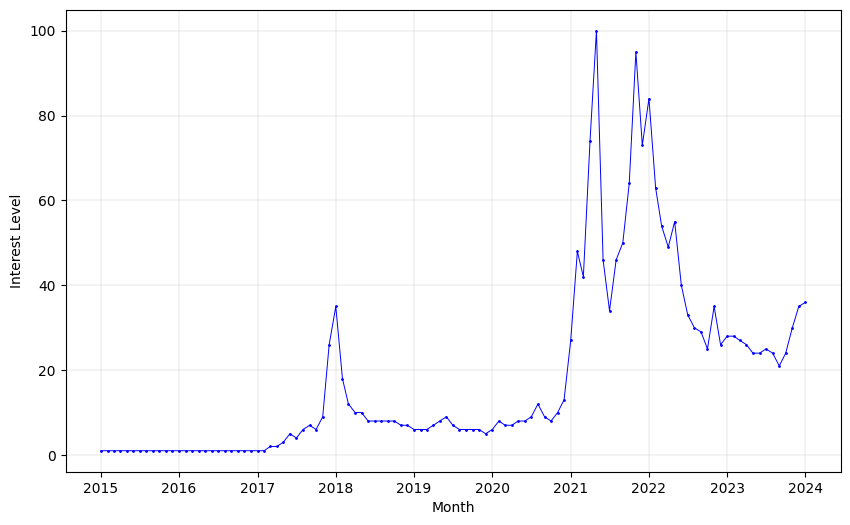

In [129]:
# Read the CSV file into a DataFrame
df = pd.read_csv('Google Trends Data Challenge Datasets/additional_datasets/crypto_searches.csv', skiprows=1)

# Convert 'Month' column to datetime format
df['Month'] = pd.to_datetime(df['Month'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['crypto: (Worlwide)'], marker='o', markersize=1, color='b', linewidth=0.7)
plt.xlabel('Month')
plt.ylabel('Interest Level')
plt.grid(True, linewidth=0.2)
plt.show()

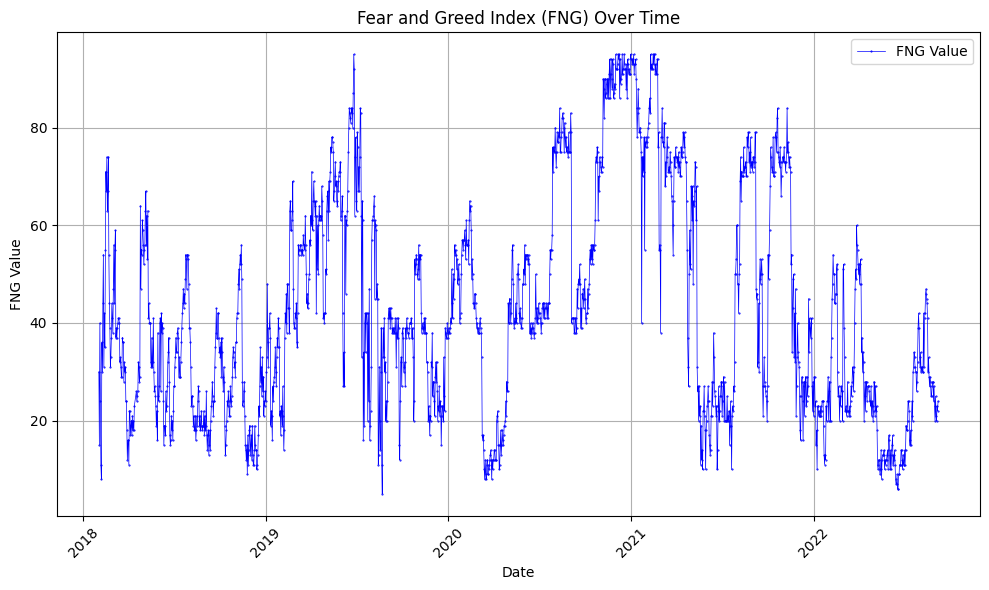

In [17]:
# Load data from CSV
data = pd.read_csv('Google Trends Data Challenge Datasets/additional_datasets/fear_and_greed_index.csv')

# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y')

# Sort data by date in ascending order
data.sort_values(by='date', ascending=True, inplace=True)

# Plot FNG value over time
plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['fng_value'], marker='o', color='blue', label='FNG Value', linewidth=0.5, markersize=0.5)

plt.xlabel('Date')
plt.ylabel('FNG Value')
plt.title('Fear and Greed Index (FNG) Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

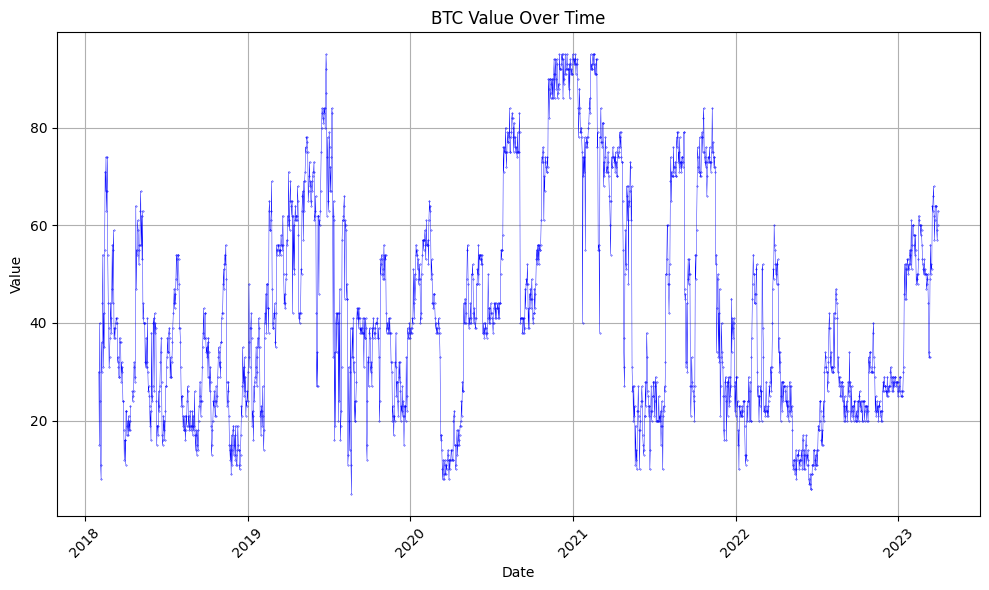

In [20]:
data = pd.read_csv('Google Trends Data Challenge Datasets/additional_datasets/btc_fear_greed.csv')

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Plot Date vs Value
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Value'], marker='o', color='blue',linewidth=0.3, markersize=0.3)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('BTC Value Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

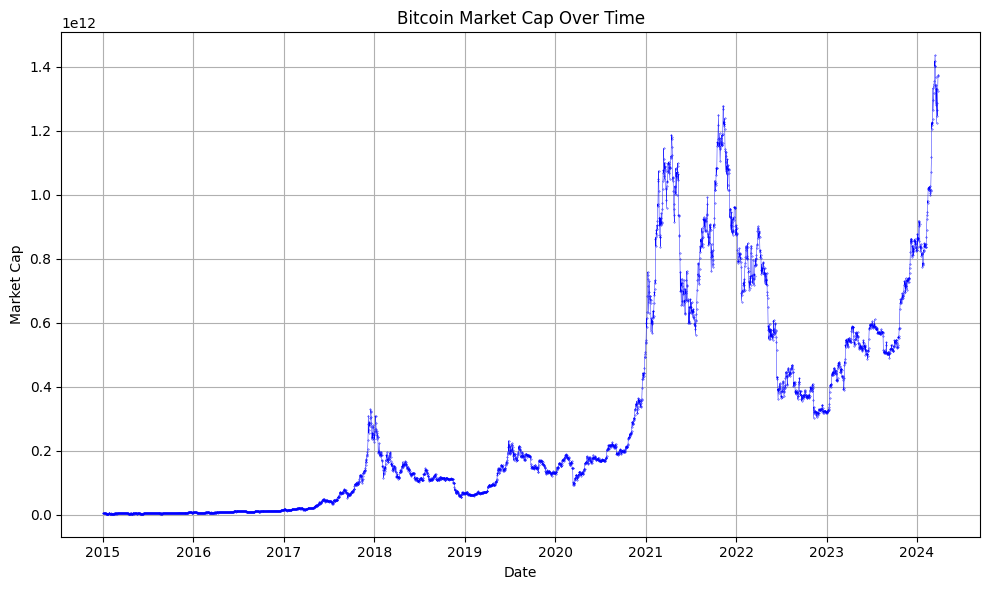

In [21]:
data = pd.read_csv('Google Trends Data Challenge Datasets/additional_datasets/archive-6/bitcoin.csv')

data['date'] = pd.to_datetime(data['date'])

plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['market_cap'], marker='o', color='blue', linewidth=0.3, markersize=0.3)
plt.xlabel('Date')
plt.ylabel('Market Cap')
plt.title('Bitcoin Market Cap Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
data = pd.read_csv('Google Trends Data Challenge Datasets/additional_datasets/archive-6/solana.csv')

# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Extract only the date part
data['date'] = data['date'].dt.date

# Keep only 'date' and 'market_cap' columns
modified_data = data[['date', 'market_cap']]

# Save the modified dataset to a new CSV file
modified_data.to_csv('Google Trends Data Challenge Datasets/additional_datasets/archive-6/solana_modified.csv', index=False)

print("Modified dataset")

Modified dataset
